In [22]:
!pip install "torch==1.4" "torchvision==0.5.0"

from fastai.vision import *
from fastai.metrics import error_rate
from urllib.request import urlopen
import requests
import json
from PIL import Image

In [3]:
# use imagenet rooms
response_room = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n04105893").text.split('\r\n')
# use imagenet houses
response_houses = requests.get("http://image-net.org/api/text/imagenet.synset.geturls?wnid=n03544360").text.split('\r\n')
response_documents = json.loads(requests.get("https://raw.githubusercontent.com/perens/picture-labelling/main/src/resources/dokumendi_blanketid.json").text)


In [4]:
!mkdir train
!mkdir train/facade0
!mkdir train/facade90
!mkdir train/facade180
!mkdir train/facade270
!mkdir train/interior0
!mkdir train/interior90
!mkdir train/interior180
!mkdir train/interior270
!mkdir train/document0
!mkdir train/document90
!mkdir train/document180
!mkdir train/document270


In [ ]:
#download images
! rm facades.csv
! rm interiors.csv
! rm documents.csv

facades = [url for url in response_houses]
interiors = [url for url in response_room]
documents = [url for url in response_documents]

f = open("facades.csv", "a")
for url in facades:
  f.write(url + "\n")
f.close()

f = open("interiors.csv", "a")
for url in interiors:
  f.write(url + "\n")
f.close()

f = open("documents.csv", "a")
for url in documents:
  f.write(url + "\n")
f.close()

download_images("facades.csv", 'train/facade0', max_pics=1000)
download_images("interiors.csv", 'train/interior0', max_pics=1000)
download_images("documents.csv", 'train/document0', max_pics=1000)


In [23]:
#rotate images

for directory in ["train/facade0", "train/interior0", "train/document0"]:
  print(directory)
  for entry in os.scandir(directory):
    if entry.path.endswith(".jpg") and entry.is_file():
      print(".", end=" ")
      img = Image.open(entry.path)
      path_parts = img.filename.split('/')      
      label = path_parts[1][:-1]
      degrees = [90, 180, 270]
      filename = path_parts[2]
      for d in degrees:
          rotate_img = img.rotate(d, expand=True)
          rot_name =  f"train/{label}{d}/{filename}"
          rotate_img.save(rot_name)

train/facade0
. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 

In [13]:
path = "train"
data = ImageDataBunch.from_folder(
    path, train=".", valid_pct=0.2, ds_tfms=get_transforms(), size=224, num_workers=4
    ).normalize(imagenet_stats)


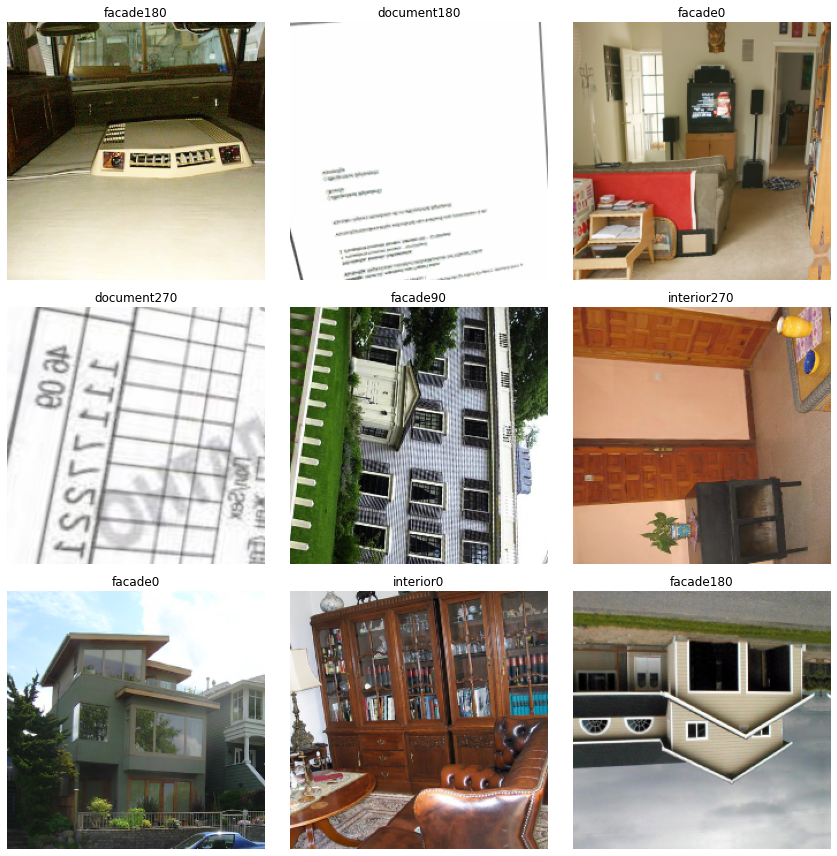

In [15]:
data.show_batch(rows=3, figsize=(12,12))

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)
learn.fit_one_cycle(5) #change to 5 for more training
interp = ClassificationInterpretation.from_learner(learn)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,accuracy,time
0,2.537963,1.533074,0.419048,00:58
1,1.924595,1.399612,0.415238,00:58
2,1.521554,1.251195,0.414286,00:58
3,1.338249,1.198571,0.410476,00:58
4,1.209340,1.169889,0.425714,00:58


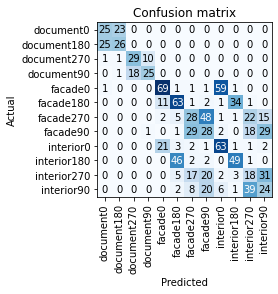

In [17]:
interp.plot_confusion_matrix()

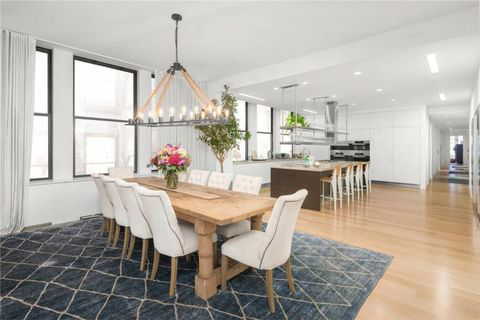

In [18]:
from urllib.request import urlopen
img = open_image(urlopen("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fhips.hearstapps.com%2Fhmg-prod.s3.amazonaws.com%2Fimages%2Fhbz-jennifer-lopez-penthouse-01-1507665932.jpg%3Fcrop%3D1xw%3A1xh%3Bcenter%2Ctop%26resize%3D480%3A*&f=1&nofb=1"))
img

In [19]:
pred_class,pred_idx,outputs = learn.predict(img)

data.classes[int(pred_class)]

'interior0'

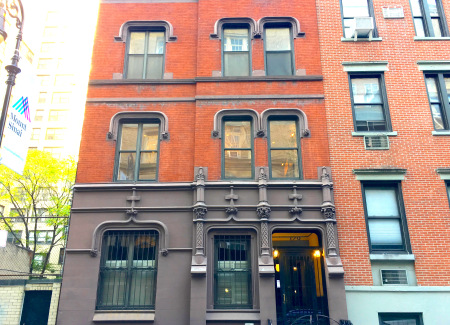

In [20]:
from urllib.request import urlopen
img = open_image(urlopen("https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fephemeralnewyork.files.wordpress.com%2F2016%2F10%2Fapartmentfirstcloseup.jpg%3Fw%3D450%26h%3D326&f=1&nofb=1"))
img

In [21]:
pred_class,pred_idx,outputs = learn.predict(img)

data.classes[int(pred_class)]

'facade0'